# Code to classify images (CIFAR-10) using CNNs

### Step 0: Problem statement

- CIFAR-10 is a dataset that consists of several images devided into the following 10 classes:
    - Airplanes
    - Cars
    - Birds
    - Cats
    - Deer
    - Dogs
    - Frogs
    - Horses
    - Ships
    - Trucks
- The dataset stands for the Canadian Institute For Advanced Research (CIFAR)
- CIFAR-10 is widely used for machine learning and computer vision applications
- The dataset consists of 60000 32x32 color images and 6000 images of each class
- Images have low resolution (32x32)
- Data source: https://www.cs.toronto.edu/~kriz/cifar.html

### Step 1: Import libraries/datasets

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn

In [2]:
from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

Using TensorFlow backend.


In [3]:
print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print('X_test:', X_test.shape)
print('y_test:', y_test.shape)

X_train: (50000, 32, 32, 3)
y_train: (50000, 1)
X_test: (10000, 32, 32, 3)
y_test: (10000, 1)


### Step 2: Visualize data

[3]


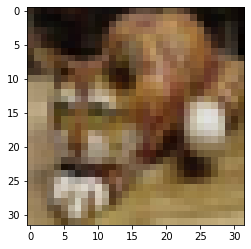

In [4]:
i = 1010
plt.imshow(X_train[i])
print(y_train[i])

/Users/eldarkalachev/anaconda/anaconda3/lib/python3.7/site-packages/matplotlib/text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


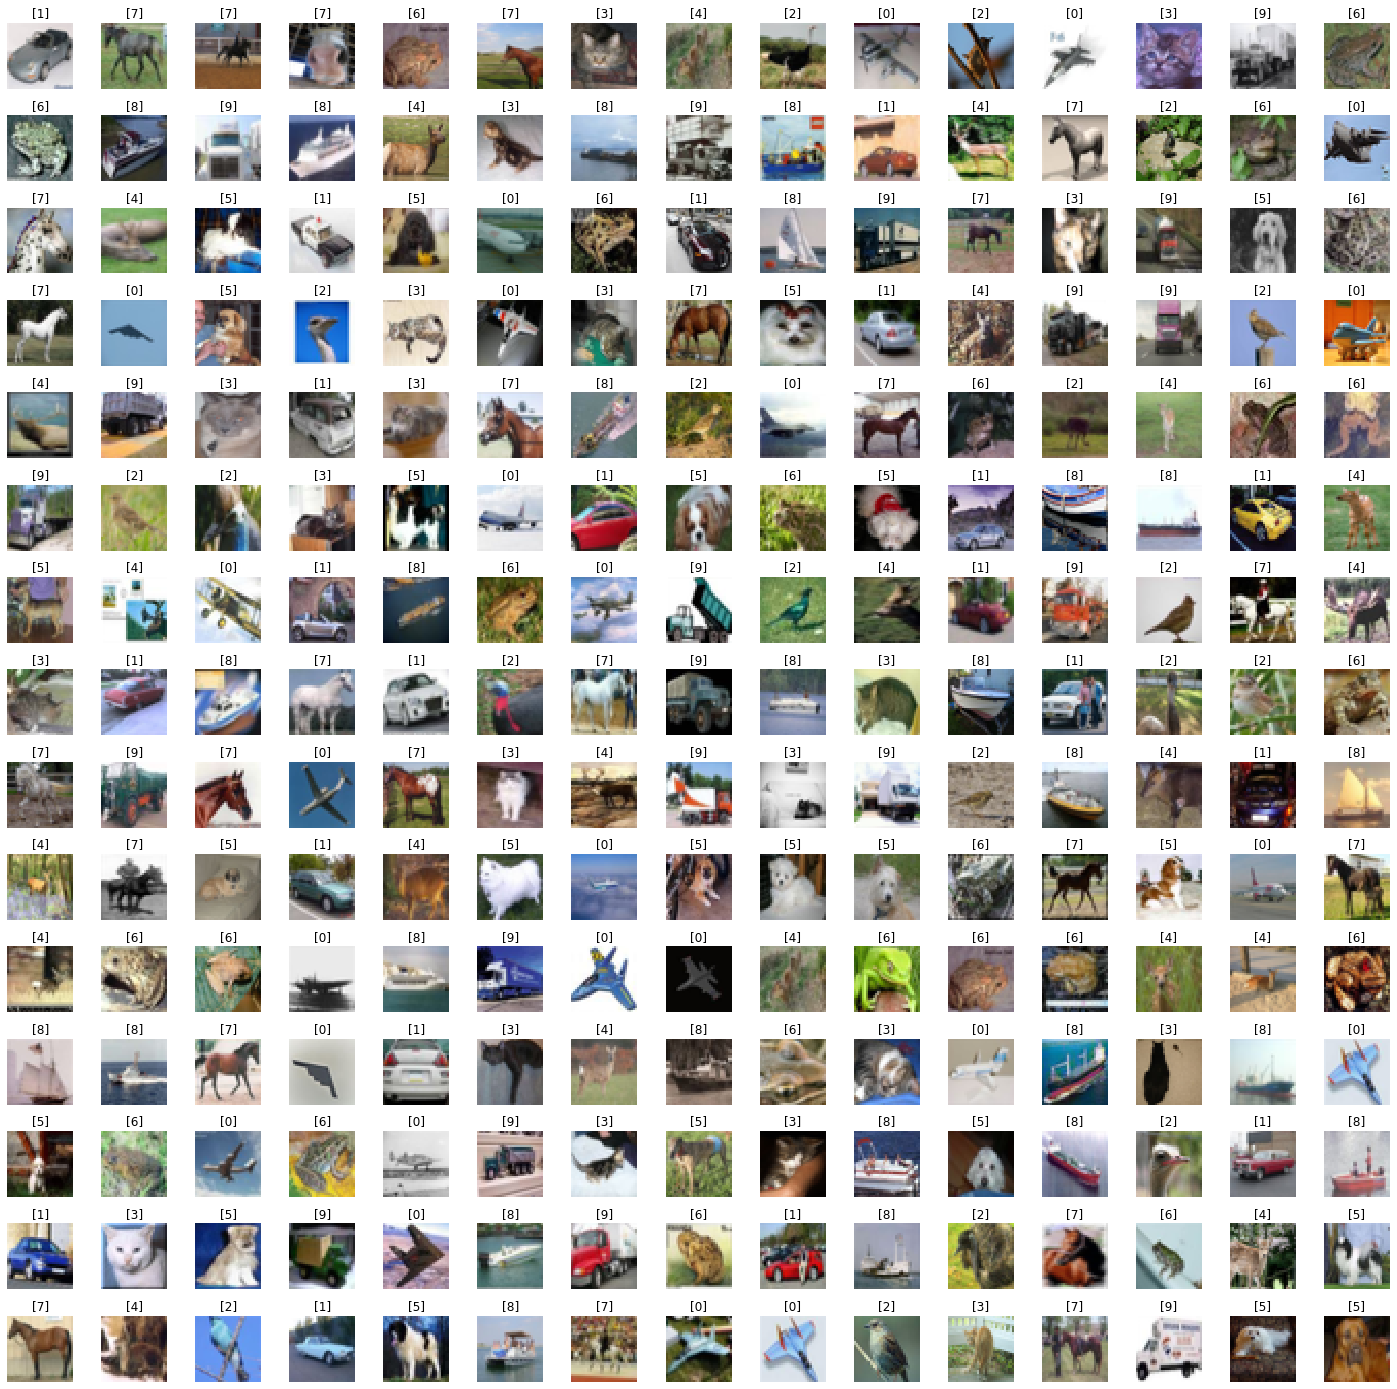

In [5]:
W_grid = 15
L_grid = 15

fig, axes = plt.subplots(L_grid, W_grid, figsize = (25, 25))
axes = axes.ravel()

n_training = len(X_train)

for i in np.arange(0, L_grid * W_grid):
    index = np.random.randint(0, n_training)
    axes[i].imshow(X_train[index])
    axes[i].set_title(y_train[index])
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)

### Step 3: Data preparation

In [6]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [7]:
number_cat = 10

In [8]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [9]:
import keras

# convert data to categorical format, binary format
y_train = keras.utils.to_categorical(y_train, number_cat)
y_test = keras.utils.to_categorical(y_test, number_cat)

In [10]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [11]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [12]:
# data normalization
X_train = X_train / 255
X_test = X_test / 255

In [13]:
X_train

array([[[[0.23137255, 0.24313726, 0.24705882],
         [0.16862746, 0.18039216, 0.1764706 ],
         [0.19607843, 0.1882353 , 0.16862746],
         ...,
         [0.61960787, 0.5176471 , 0.42352942],
         [0.59607846, 0.49019608, 0.4       ],
         [0.5803922 , 0.4862745 , 0.40392157]],

        [[0.0627451 , 0.07843138, 0.07843138],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509805, 0.21568628],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117648, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215687, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941177, 0.19607843],
         [0.47058824, 0.32941177, 0.19607843],
         [0.42745098, 0.28627452, 0.16470589]],

        ...,

        [[0.8156863 , 0.6666667 , 0.3764706 ],
         [0.7882353 , 0.6       , 0.13333334]

In [14]:
X_train.shape

(50000, 32, 32, 3)

In [15]:
Input_shape = X_train.shape[1:]

In [16]:
Input_shape

(32, 32, 3)

### Step 4: Train the model

In [17]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [18]:
cnn_model = Sequential()

# the first two layers of convolution
cnn_model.add(Conv2D(filters = 32, kernel_size = (3, 3), activation = 'relu', input_shape = Input_shape))
cnn_model.add(Conv2D(filters = 32, kernel_size = (3, 3), activation = 'relu'))
cnn_model.add(MaxPooling2D(2, 2))
cnn_model.add(Dropout(0.3))

# the second two layers of convolution
cnn_model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu'))
cnn_model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu'))
cnn_model.add(MaxPooling2D(2, 2))
cnn_model.add(Dropout(0.2))

# flattening
cnn_model.add(Flatten())

# fully connected AI. units - how many neurons
# inputs
cnn_model.add(Dense(units = 512, activation = 'relu'))
cnn_model.add(Dense(units = 512, activation = 'relu'))
# outputs. units = 10 because we have 10 output classes (Airplanes, Cars, Birds, Cats, Deer, Dogs, Frogs, Horses, Ships, Trucks)
cnn_model.add(Dense(units = 10, activation = 'softmax'))

In [19]:
cnn_model.compile(loss = 'categorical_crossentropy', optimizer = keras.optimizers.rmsprop(lr = 0.001), metrics = ['accuracy'])

In [20]:
history = cnn_model.fit(X_train, y_train, batch_size = 32, epochs = 2, shuffle = True)

Epoch 1/2
50000/50000 [==============================] - 99s 2ms/step - loss: 1.5605 - accuracy: 0.4369
Epoch 2/2
50000/50000 [==============================] - 100s 2ms/step - loss: 1.1294 - accuracy: 0.6057


### Step 5: Evaluate the model

In [21]:
evaluation = cnn_model.evaluate(X_test, y_test)
print('Test Accuracy: {}'.format(evaluation[1]))

10000/10000 [==============================] - 3s 335us/step
Test Accuracy: 0.6208999752998352


In [36]:
predicted_classes = cnn_model.predict_classes(X_test)

In [42]:
import cv2

In [49]:
%gui qt

from PyQt5.QtWidgets import QFileDialog

def gui_fname(dir=None):
    """Select a file via a dialog and return the file name."""
    if dir is None: dir ='./'
    fname = QFileDialog.getOpenFileName(None, "Select data file...", 
                dir, filter="All files (*);; SM Files (*.sm)")
    return fname[0]

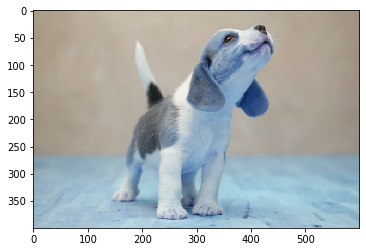

In [66]:
image_path = gui_fname()

image = cv2.imread(image_path)

plt.imshow(image)

In [67]:
output = image.copy()

image = cv2.resize(image, (32, 32))

image = image.astype("float") / 255.0

#image = image.flatten()
#image = image.reshape((1, image.shape[0]))

preds = cnn_model.predict([image])
preds

ValueError: Error when checking input: expected conv2d_1_input to have 4 dimensions, but got array with shape (1, 3072)

In [23]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [24]:
# should return back to values again from binary format to decimal values
y_test = y_test.argmax(1)

In [25]:
y_test

array([3, 8, 8, ..., 5, 1, 7])

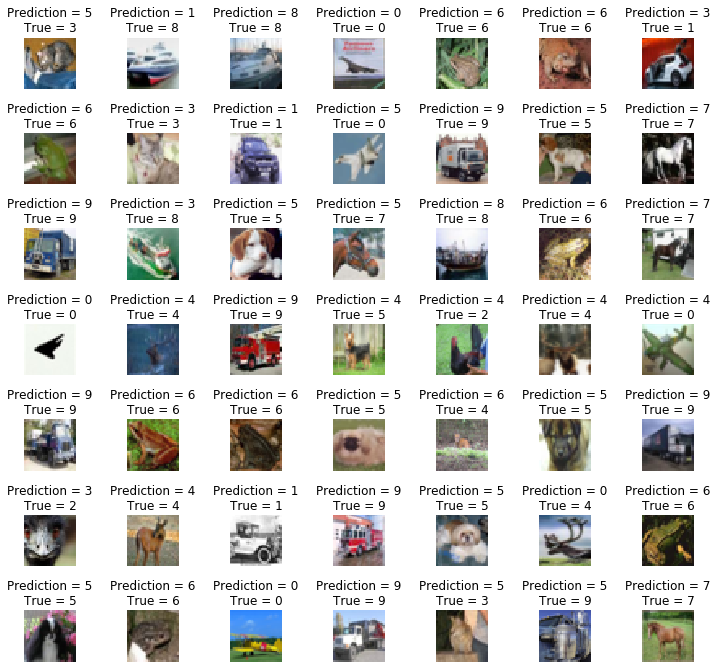

In [26]:
L = 7
W = 7
fig, axes = plt.subplots(L, W, figsize = (12, 12))
axes = axes.ravel()

for i in np.arange(0, L * W):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction = {}\nTrue = {}'.format(predicted_classes[i], y_test[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace=1)

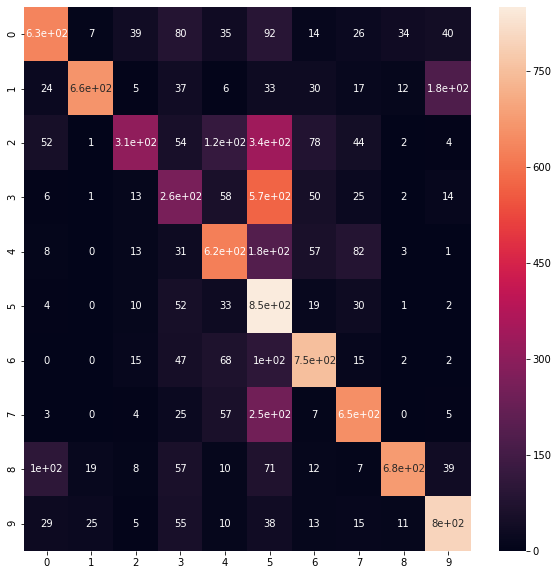

In [27]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, predicted_classes)
cm
plt.figure(figsize = (10, 10))
sns.heatmap(cm, annot = True)

### Step 6: Saving the model

In [28]:
import os

def save_model(filename):
    directory = os.path.join(os.getcwd(), 'saved_models')

    if not os.path.isdir(directory):
        os.makedirs(directory)

    model_path = os.path.join(directory, filename)
    cnn_model.save(model_path)

save_model('keras_cifar10_trained_model.h5')

### Step 7.1: Data augmentation for the CIFAR-10 dataset

In [ ]:
import keras
from keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [ ]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [ ]:
X_train.shape

In [ ]:
n = 8
X_train_sample = X_train[:n]

In [ ]:
X_train_sample.shape

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
dataget_train = ImageDataGenerator(rotation_range=90)
dataget_train.fit(X_train_sample)

In [ ]:
from scipy.misc import toimage

fig = plt.figure(figsize=(20, 2))
for x_batch in dataget_train.flow(X_train_sample, batch_size=n):
    for i in range(0, n):
        ax = fig.add_subplot(1, n, i + 1)
        ax.imshow(toimage(x_batch[i]))
    
    fig.suptitle('Augmented images (rotated 90 degrees)')
    plt.show()
    break

### Stap 7.2: Model training using augemented dataset

In [29]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
        rotation_range=90,
        width_shift_range=0.1,
        horizontal_flip=True,
        vertical_flip=True
    )

In [30]:
datagen.fit(X_train)

In [33]:
cnn_model.fit_generator(datagen.flow(X_train, y_train, batch_size=32), epochs=2)

Epoch 1/2
1563/1563 [==============================] - 102s 65ms/step - loss: 1.5365 - accuracy: 0.4541
Epoch 2/2
1563/1563 [==============================] - 109s 70ms/step - loss: 1.5054 - accuracy: 0.4658


In [ ]:
score = cnn_model.evaluate(X_test, y_test)
print('Test accuracy: {}'.format(score[1]))

In [ ]:
# save the model
save_model('keras_cifar10_trained_model_Augmentation.h5')